In [26]:
import netCDF4 as nc
with nc.Dataset('trainingData.nc','r') as f:
    x=f['x'][:]
    y=f['y'][:,:1]

import numpy as np
import matplotlib.pyplot as plt
# import scaler from sklearn

from sklearn.preprocessing import StandardScaler
scalerX=StandardScaler()
scalerY=StandardScaler()
scalerX.fit(x)
scalerY.fit(y)
x_scaled=scalerX.transform(x)
y_scaled=scalerY.transform(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=42)

print(x_train.shape)

(348000, 13)


In [27]:
import tensorflow as tf
# define tensorflow model using keras. model is a sequential model with 2 hidden layers
# and 1 output layer. input layer is 12 nodes, hidden layers are 12 nodes each, and output layer is 11 nodes.

# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, activation='relu', input_shape=(13,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 60)                840       
                                                                 
 batch_normalization_5 (Bat  (None, 60)                240       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 60)                3660      
                                                                 
 batch_normalization_6 (Bat  (None, 60)                240       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 30)                1830      
                                                                 
 dense_14 (Dense)            (None, 1)                

In [28]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=300, validation_data=(x_test, y_test))

Epoch 1/100
1160/1160 [==============================] - 2s 1ms/step - loss: 0.3624 - mse: 0.3624 - val_loss: 0.1949 - val_mse: 0.1949
Epoch 2/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.1815 - mse: 0.1815 - val_loss: 0.1592 - val_mse: 0.1592
Epoch 3/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.1573 - mse: 0.1573 - val_loss: 0.1307 - val_mse: 0.1307
Epoch 4/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.1376 - mse: 0.1376 - val_loss: 0.1276 - val_mse: 0.1276
Epoch 5/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.1236 - mse: 0.1236 - val_loss: 0.1110 - val_mse: 0.1110
Epoch 6/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.1180 - mse: 0.1180 - val_loss: 0.0969 - val_mse: 0.0969
Epoch 7/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.1064 - mse: 0.1064 - val_loss: 0.1026 - val_mse: 0.1026
Epoch 8/100
1160/1160 [==============================] 

In [32]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=300, validation_data=(x_test, y_test))

Epoch 1/100
1160/1160 [==============================] - 2s 1ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 2/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 3/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 4/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 5/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.0415 - mse: 0.0415 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 6/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 7/100
1160/1160 [==============================] - 1s 1ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 8/100
1160/1160 [==============================] 

In [33]:
y_=model.predict(x_test)

2719/2719 [==============================] - 1s 353us/step


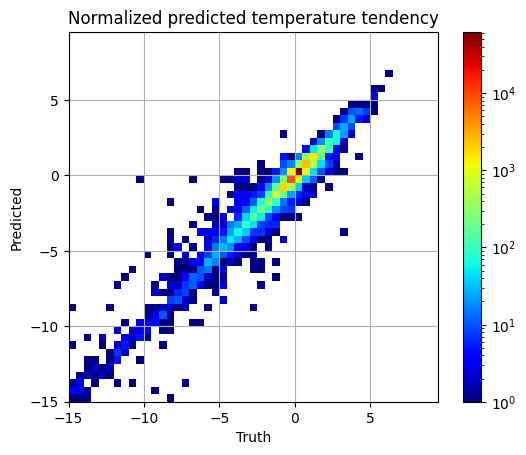

In [34]:
import matplotlib
ax=plt.subplot(111)
h1=plt.hist2d(y_test[:,0],y_[:,0],bins=-15+np.arange(50)*0.5,cmap='jet',norm=matplotlib.colors.LogNorm())
plt.title('Normalized predicted temperature tendency')
plt.ylabel('Predicted')
plt.xlabel('Truth')
plt.grid()
ax.set_aspect(1.0)
plt.colorbar()

plt.savefig('ML_TempTend.png')

(array([7.000e+00, 9.000e+00, 1.100e+01, 9.000e+00, 7.000e+00, 1.200e+01,
        1.500e+01, 1.200e+01, 1.300e+01, 2.500e+01, 2.100e+01, 1.600e+01,
        2.700e+01, 3.300e+01, 3.200e+01, 3.400e+01, 3.900e+01, 5.700e+01,
        6.400e+01, 6.900e+01, 8.800e+01, 9.900e+01, 1.300e+02, 1.440e+02,
        1.730e+02, 2.280e+02, 2.880e+02, 3.600e+02, 4.870e+02, 7.440e+02,
        1.273e+03, 2.328e+03, 5.180e+03, 6.256e+04, 5.686e+03, 2.385e+03,
        1.859e+03, 1.258e+03, 3.870e+02, 2.380e+02, 1.330e+02, 9.500e+01,
        6.200e+01, 4.500e+01, 2.300e+01, 2.600e+01, 2.200e+01, 1.700e+01,
        6.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([-10. ,  -9.7,  -9.4,  -9.1,  -8.8,  -8.5,  -8.2,  -7.9,  -7.6,
         -7.3,  -7. ,  -6.7,  -6.4,  -6.1,  -5.8,  -5.5,  -5.2,  -4.9,
         -4.6,  -4.3,  -4. ,  -3.7,  -3.4,  -3.1,  -2.8,  -2.5,  -2.2,
         -1.9,  -1.6,  -1.3,  -1. ,  -0.7,  -

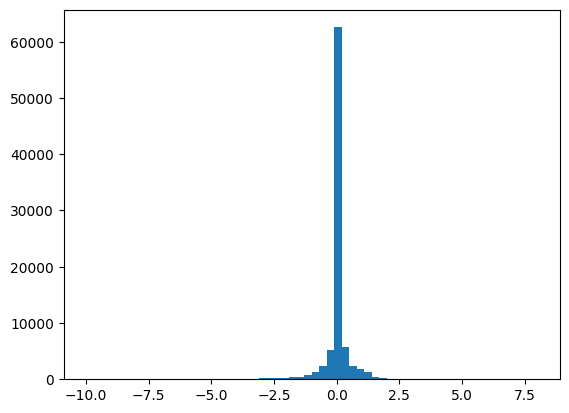

In [35]:
plt.hist(y_[:,0],bins=-10+np.arange(61)*0.3)

In [38]:
levs=np.array([18.00000,14.00000,10.00000,8.000000,6.000000,4.000000,2.000000,1.000000,0.5000000,0.0000000E+00])
angle=18.09696
env_node=88-levs/np.cos(angle * np.pi / 180.) * 4.
print(env_node.astype(int))

[12 29 45 54 62 71 79 83 85 88]


In [36]:
import numpy as np
print(np.corrcoef(y_[:,0],y_test[:,0]))

[[1.         0.98087305]
 [0.98087305 1.        ]]
